# Import data

In [2]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm_notebook
from sklearn.metrics.pairwise import euclidean_distances


# Import the plotting library
import matplotlib.pyplot as plt
import seaborn as sns
 
# Import the yfinance. If you get module not found error the run !pip install yfiannce from your Jupyter notebook
import yfinance as yf  

[*********************100%***********************]  1 of 1 completed


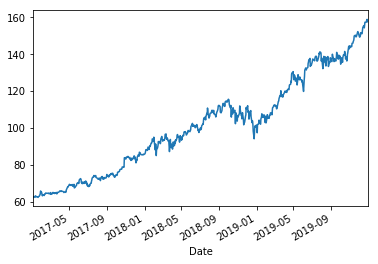

Time series length: 753
[*********************100%***********************]  1 of 1 completed


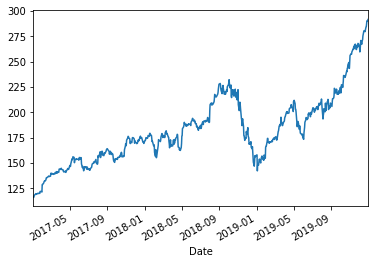

Time series length: 753


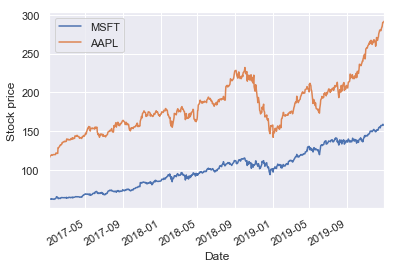

In [3]:
# Get the data of the stock MSFT
data_msft = yf.download(tickers='MSFT', start='2017-01-01', end='2019-12-31')
 
# Plot the close price of the MSFT
data_msft.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_msft)))

# Get the data of the stock AAPL
data_aapl = yf.download(tickers='AAPL', start='2017-01-01', end='2019-12-31')
 
# Plot the close price of the AAPL
data_aapl.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_aapl)))

# Plot the close price of both series
sns.set(font_scale = 1)
data_msft.Close.plot(label='MSFT')
data_aapl.Close.plot(label='AAPL')
plt.legend()
plt.ylabel('Stock price')
plt.savefig('msft_aapl_plot.png', dpi=200)
plt.show()

[*********************100%***********************]  1 of 1 completed


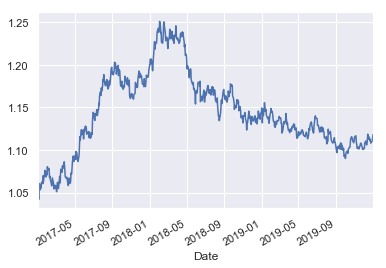

Time series length: 778
[*********************100%***********************]  1 of 1 completed


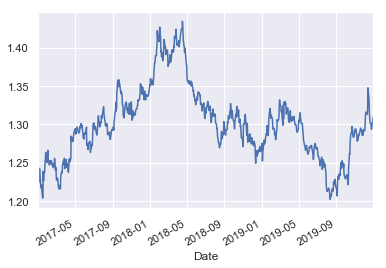

Time series length: 778


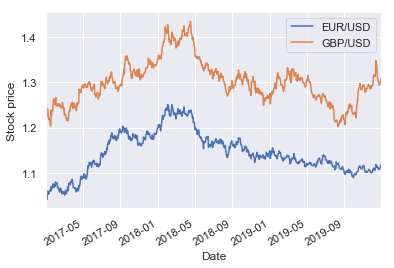

In [4]:
# Get the data of the stock EUR/USD
data_eur = yf.download(tickers='EURUSD=X', start='2017-01-01', end='2019-12-31')
 
# Plot the close price of the EUR/USD
data_eur.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_eur)))

# Get the data of the stock GBP/USD
data_gbp = yf.download(tickers='GBPUSD=X', start='2017-01-01', end='2019-12-31')
 
# Plot the close price of the GBP/USD
data_gbp.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_gbp)))

# Plot the close price of both series
sns.set(font_scale = 1)
data_eur.Close.plot(label='EUR/USD')
data_gbp.Close.plot(label='GBP/USD')
plt.legend()
plt.ylabel('Stock price')
plt.savefig('eur_gbp_plot.png', dpi=200)
plt.show()

[*********************100%***********************]  1 of 1 completed


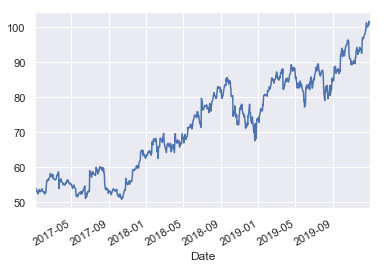

Time series length: 753
[*********************100%***********************]  1 of 1 completed


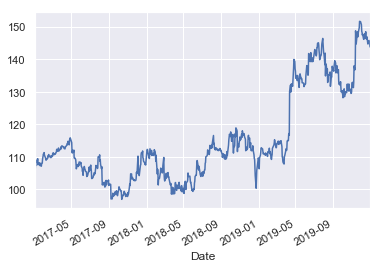

Time series length: 753


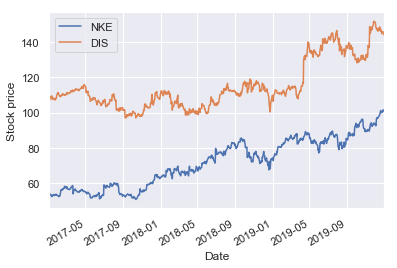

In [5]:
# Get the data of the stock Nike
data_nke = yf.download(tickers='NKE', start='2017-01-01', end='2019-12-31')

# Plot the close price of the Nike
data_nke.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_nke)))

# Get the data of the stock Disney
data_dis = yf.download(tickers='DIS', start='2017-01-01', end='2019-12-31')
 
# Plot the close price of the GBP/USD
data_dis.Close.plot()
plt.show()
print("Time series length: {}".format(len(data_dis)))

# Plot the close price of both series
sns.set(font_scale = 1)
data_nke.Close.plot(label='NKE')
data_dis.Close.plot(label='DIS')
plt.legend()
plt.ylabel('Stock price')
plt.savefig('nke_dis_plot.png', dpi=200)
plt.show()

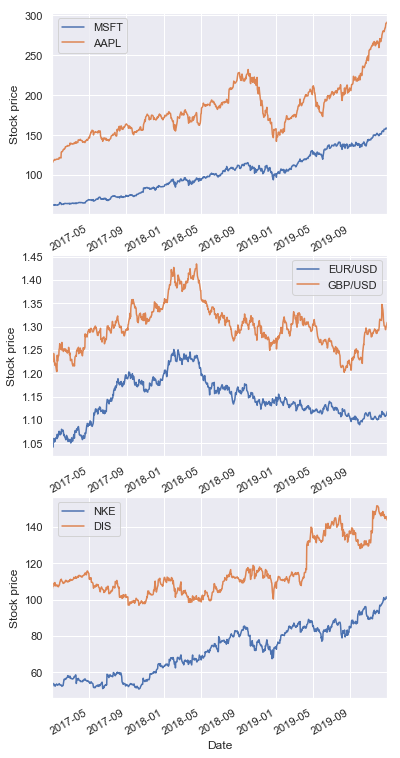

In [6]:
sns.set(font_scale = 1)

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(6,14))

fig1 = data_msft.Close.plot(label='MSFT', ax=ax[0])
fig1 = data_aapl.Close.plot(label='AAPL', ax=ax[0])
fig1.legend()

fig1 = data_eur.Close.plot(label='EUR/USD', ax=ax[1])
fig1 = data_gbp.Close.plot(label='GBP/USD', ax=ax[1])
fig1.legend()

fig1 = data_nke.Close.plot(label='NKE', ax=ax[2])
fig1 = data_dis.Close.plot(label='DIS', ax=ax[2])
fig1.legend()

ax[0].set_ylabel('Stock price')
ax[1].set_ylabel('Stock price')
ax[2].set_ylabel('Stock price')
plt.savefig('line_plots.png', dpi=200)
plt.show()

# Data analysis

In [6]:
# Merge stocks that are gonna be compared
data_1 = pd.merge(left=data_msft[['Close']],
                       right=data_aapl[['Close']],
                       left_index=True,
                       right_index=True,
                       how='left')
data_1.columns = ['MSFT', 'AAPL']

data_2 = pd.merge(left=data_eur[['Close']],
                       right=data_gbp[['Close']],
                       left_index=True,
                       right_index=True,
                       how='left')
data_2.columns = ['EUR/USD', 'GBP/USD']

data_3 = pd.merge(left=data_nke[['Close']],
                       right=data_dis[['Close']],
                       left_index=True,
                       right_index=True,
                       how='left')
data_3.columns = ['NKE', 'DIS']

# Descriptive statistics
print(data_1.describe(), '\n',
      data_2.describe(), '\n',
      data_3.describe())

             MSFT        AAPL
count  753.000000  753.000000
mean   101.097065  182.506746
std     26.024495   34.221945
min     62.299999  116.019997
25%     75.209999  156.389999
50%    101.120003  175.850006
75%    119.279999  203.860001
max    158.960007  291.519989 
           EUR/USD     GBP/USD
count  778.000000  778.000000
mean     1.143614    1.300282
std      0.046032    0.047744
min      1.041992    1.202198
25%      1.113707    1.269950
50%      1.137475    1.296554
75%      1.175195    1.323381
max      1.251001    1.434206 
               NKE         DIS
count  753.000000  753.000000
mean    71.773373  115.151501
std     13.652446   13.929843
min     50.830002   96.930000
25%     57.799999  105.260002
50%     72.750000  110.970001
75%     83.470001  117.120003
max    101.570000  151.639999


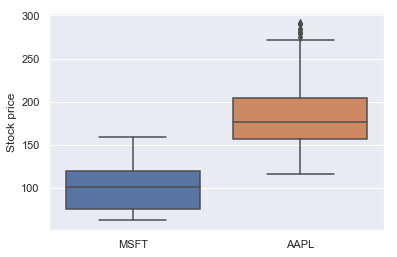

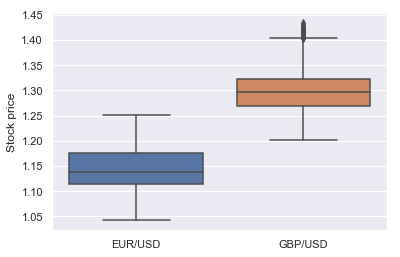

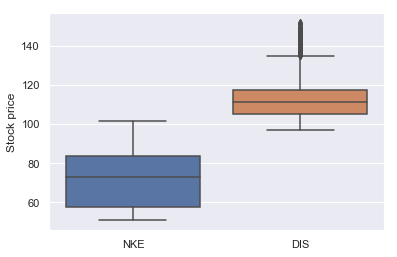

In [7]:
# Boxplot of the stocks
sns.boxplot(data=data_1)
plt.ylabel('Stock price')
plt.savefig('msft_aapl_boxplot.png', dpi=200)
plt.show()

sns.boxplot(data=data_2)
plt.ylabel('Stock price')
plt.savefig('eur_gbp_boxplot.png', dpi=200)
plt.show()

sns.boxplot(data=data_3)
plt.ylabel('Stock price')
plt.savefig('nke_dis_boxplot.png', dpi=200)
plt.show()

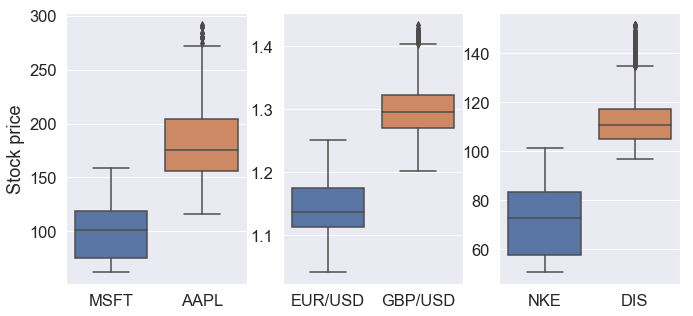

In [8]:
sns.set(font_scale = 1.5)

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(11,5))

sns.boxplot(data=data_1, ax=ax[0])
sns.boxplot(data=data_2, ax=ax[1])
sns.boxplot(data=data_3, ax=ax[2])

ax[0].set_ylabel('Stock price')
plt.savefig('boxplots.png', dpi=200)
plt.show()

# Euclidean Distance

In [30]:
# Create numpy arrays
# Calculate Euclidean distance between the pairs
msft = np.array(data_1['MSFT'], dtype=np.float)
aapl = np.array(data_1['AAPL'], dtype=np.float)
eur = np.array(data_2['EUR/USD'], dtype=np.float)
gbp = np.array(data_2['GBP/USD'], dtype=np.float)
nke = np.array(data_3['NKE'], dtype=np.float)
dis = np.array(data_3['DIS'], dtype=np.float)

In [36]:
# MSFT and AAPL
stock_1 = msft
stock_2 = aapl

e_1 = {}
for i in range(1, 6):
    print('Euclidean distance speed on ' + str(i) + '/5 of length')
    length = int(len(stock_1)/5)*i
    print('Length of sequence is: {}'.format(length))
    
    start = time.time()
    distance = np.linalg.norm(stock_1[0:length]-stock_2[0:length])
    end = time.time()
    seconds = end-start
    
    print('Distance is: {}'.format(distance))
    print('Time: {} seconds'.format(round(seconds, 4)))
    e_1[length] = end-start
    print('--------')

Euclidean distance speed on 1/5 of length
Length of sequence is: 150
Distance is: 914.0366587229611
Time: 0.0001 seconds
--------
Euclidean distance speed on 2/5 of length
Length of sequence is: 300
Distance is: 1374.9562439985896
Time: 0.0001 seconds
--------
Euclidean distance speed on 3/5 of length
Length of sequence is: 450
Distance is: 1789.8505789138298
Time: 0.0001 seconds
--------
Euclidean distance speed on 4/5 of length
Length of sequence is: 600
Distance is: 2001.351894053882
Time: 0.0001 seconds
--------
Euclidean distance speed on 5/5 of length
Length of sequence is: 750
Distance is: 2268.7854112574796
Time: 0.0 seconds
--------


In [37]:
# MSFT and AAPL
stock_1 = eur
stock_2 = gbp

e_2 = {}
for i in range(1, 6):
    print('Euclidean distance speed on ' + str(i) + '/5 of length')
    length = int(len(stock_1)/5)*i
    print('Length of sequence is: {}'.format(length))
    
    start = time.time()
    distance = np.linalg.norm(stock_1[0:length]-stock_2[0:length])
    end = time.time()
    seconds = end-start
    
    print('Distance is: {}'.format(distance))
    print('Time: {} seconds'.format(round(seconds, 4)))
    e_2[length] = end-start
    print('--------')

Euclidean distance speed on 1/5 of length
Length of sequence is: 155
Distance is: 2.140956831527707
Time: 0.0001 seconds
--------
Euclidean distance speed on 2/5 of length
Length of sequence is: 310
Distance is: 2.8295706131084577
Time: 0.0001 seconds
--------
Euclidean distance speed on 3/5 of length
Length of sequence is: 465
Distance is: 3.4387164814471745
Time: 0.0001 seconds
--------
Euclidean distance speed on 4/5 of length
Length of sequence is: 620
Distance is: 3.989148557333379
Time: 0.0001 seconds
--------
Euclidean distance speed on 5/5 of length
Length of sequence is: 775
Distance is: 4.409730760622889
Time: 0.0001 seconds
--------


In [38]:
# MSFT and AAPL
stock_1 = nke
stock_2 = dis

e_3 = {}
for i in range(1, 6):
    print('Euclidean distance speed on ' + str(i) + '/5 of length')
    length = int(len(stock_1)/5)*i
    print('Length of sequence is: {}'.format(length))
    
    start = time.time()
    distance = np.linalg.norm(stock_1[0:length]-stock_2[0:length])
    end = time.time()
    seconds = end-start
    
    print('Distance is: {}'.format(distance))
    print('Time: {} seconds'.format(round(seconds, 4)))
    e_3[length] = end-start
    print('--------')

Euclidean distance speed on 1/5 of length
Length of sequence is: 150
Distance is: 662.749268886322
Time: 0.0001 seconds
--------
Euclidean distance speed on 2/5 of length
Length of sequence is: 300
Distance is: 857.6520726193035
Time: 0.0001 seconds
--------
Euclidean distance speed on 3/5 of length
Length of sequence is: 450
Distance is: 943.8591354637139
Time: 0.0001 seconds
--------
Euclidean distance speed on 4/5 of length
Length of sequence is: 600
Distance is: 1048.8588462590835
Time: 0.0001 seconds
--------
Euclidean distance speed on 5/5 of length
Length of sequence is: 750
Distance is: 1217.9097483814933
Time: 0.0001 seconds
--------


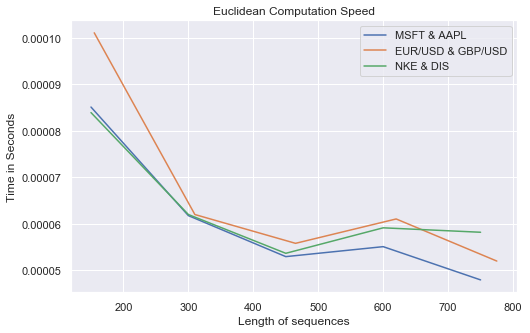

In [67]:
# Plot the lines in one graph
lists_1 = sorted(e_1.items())
x_1,y_1 = zip(*lists_1)

lists_2 = sorted(e_2.items())
x_2,y_2 = zip(*lists_2)

lists_3 = sorted(e_3.items())
x_3,y_3 = zip(*lists_3)

sns.set(font_scale = 1)
plt.figure(figsize=(8,5))
plt.plot(x_1, y_1, label='MSFT & AAPL')
plt.plot(x_2, y_2, label='EUR/USD & GBP/USD')
plt.plot(x_3, y_3, label='NKE & DIS')

plt.title('Euclidean Computation Speed')
plt.xlabel('Length of sequences')
plt.ylabel('Time in Seconds')
plt.ylabel('Time in Seconds')
plt.legend()
plt.savefig('euclidean_comp_speed.png', dpi=200)
plt.show()

In [105]:
e_1

{150: 8.511543273925781e-05,
 300: 6.175041198730469e-05,
 450: 5.2928924560546875e-05,
 600: 5.507469177246094e-05,
 750: 4.792213439941406e-05}

In [106]:
e_2

{155: 0.0001010894775390625,
 310: 6.198883056640625e-05,
 465: 5.5789947509765625e-05,
 620: 6.103515625e-05,
 775: 5.1975250244140625e-05}

In [107]:
e_3

{150: 8.392333984375e-05,
 300: 6.198883056640625e-05,
 450: 5.364418029785156e-05,
 600: 5.91278076171875e-05,
 750: 5.817413330078125e-05}

In [101]:
for i in e_3.values():
    print(round(i,6))

8.4e-05
6.2e-05
5.4e-05
5.9e-05
5.8e-05


0.000101

# Dynamic Time Warping

In [41]:
# SOURCE: https://gist.github.com/MJeremy2017/a7a666f3b2bfc333c533056a78be0654
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

DTW speed on 1/5 of length
Length of sequence is: 150
Distance is: 11125.809871673584
Time: 0.417 seconds
--------
DTW speed on 2/5 of length
Length of sequence is: 300
Distance is: 23681.47986984253
Time: 1.007 seconds
--------
DTW speed on 3/5 of length
Length of sequence is: 450
Distance is: 37583.86996078491
Time: 2.235 seconds
--------
DTW speed on 4/5 of length
Length of sequence is: 600
Distance is: 46795.289012908936
Time: 3.034 seconds
--------
DTW speed on 5/5 of length
Length of sequence is: 750
Distance is: 56766.479206085205
Time: 3.539 seconds
--------


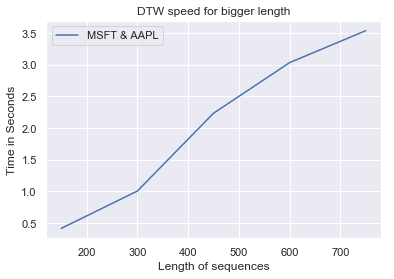

In [48]:
# MSFT and AAPL
stock_1 = msft
stock_2 = aapl
window = 100

d_1 = {}
for i in range(1, 6):
    print('DTW speed on ' + str(i) + '/5 of length')
    length = int(len(stock_1)/5)*i
    print('Length of sequence is: {}'.format(length))
    
    start = time.time()
    distance = dtw(stock_1[0:length], stock_2[0:length], window=window)[-1,-1]
    end = time.time()
    seconds = end-start
    
    print('Distance is: {}'.format(distance))
    print('Time: {} seconds'.format(round(seconds, 3)))
    d_1[length] = end-start
    print('--------')
    
lists = sorted(d_1.items())
x,y = zip(*lists)

sns.set(font_scale = 1)
plt.plot(x, y, label='MSFT & AAPL')
plt.title('DTW speed for bigger length')
plt.xlabel('Length of sequences')
plt.ylabel('Time in Seconds')
plt.legend()
plt.show()

DTW speed on 1/5 of length
Length of sequence is: 155
Distance is: 26.489263653755188
Time: 0.654 seconds
--------
DTW speed on 2/5 of length
Length of sequence is: 310
Distance is: 44.61979413032532
Time: 1.398 seconds
--------
DTW speed on 3/5 of length
Length of sequence is: 465
Distance is: 68.80951881408691
Time: 2.071 seconds
--------
DTW speed on 4/5 of length
Length of sequence is: 620
Distance is: 93.58244597911835
Time: 2.958 seconds
--------
DTW speed on 5/5 of length
Length of sequence is: 775
Distance is: 111.73242890834808
Time: 3.464 seconds
--------


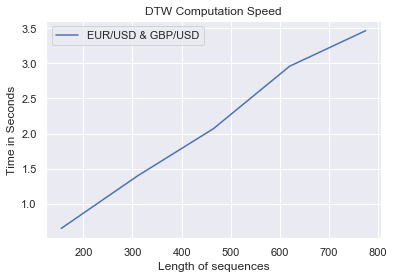

In [49]:
# EUR & GBP
stock_1 = eur
stock_2 = gbp
window = 100

d_2 = {}
for i in range(1, 6):
    print('DTW speed on ' + str(i) + '/5 of length')
    length = int(len(stock_1)/5)*i
    print('Length of sequence is: {}'.format(length))
    
    start = time.time()
    distance = dtw(stock_1[0:length], stock_2[0:length], window=window)[-1,-1]
    end = time.time()
    seconds = end-start
    
    print('Distance is: {}'.format(distance))
    print('Time: {} seconds'.format(round(seconds, 3)))
    d_2[length] = end-start
    print('--------')
    
lists = sorted(d_2.items())
x,y = zip(*lists)

sns.set(font_scale = 1)
plt.plot(x, y, label='EUR/USD & GBP/USD')
plt.title('DTW Computation Speed')
plt.xlabel('Length of sequences')
plt.ylabel('Time in Seconds')
plt.legend()
plt.show()

DTW speed on 1/5 of length
Length of sequence is: 150
Distance is: 8100.1199951171875
Time: 0.501 seconds
--------
DTW speed on 2/5 of length
Length of sequence is: 300
Distance is: 14747.59997177124
Time: 1.382 seconds
--------
DTW speed on 3/5 of length
Length of sequence is: 450
Distance is: 19552.179988861084
Time: 2.26 seconds
--------
DTW speed on 4/5 of length
Length of sequence is: 600
Distance is: 25024.259998321533
Time: 2.52 seconds
--------
DTW speed on 5/5 of length
Length of sequence is: 750
Distance is: 32109.589847564697
Time: 3.431 seconds
--------


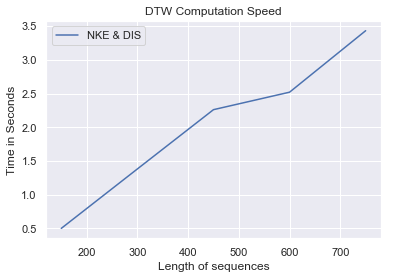

In [50]:
# NKE & DIS
stock_1 = nke
stock_2 = dis
window = 100

d_3 = {}
for i in range(1, 6):
    print('DTW speed on ' + str(i) + '/5 of length')
    length = int(len(stock_1)/5)*i
    print('Length of sequence is: {}'.format(length))
    
    start = time.time()
    distance = dtw(stock_1[0:length], stock_2[0:length], window=window)[-1,-1]
    end = time.time()
    seconds = end-start
    
    print('Distance is: {}'.format(distance))
    print('Time: {} seconds'.format(round(seconds, 3)))
    d_3[length] = end-start
    print('--------')
    
lists = sorted(d_3.items())
x,y = zip(*lists)

sns.set(font_scale = 1)
plt.plot(x, y, label='NKE & DIS')
plt.title('DTW Computation Speed')
plt.xlabel('Length of sequences')
plt.ylabel('Time in Seconds')
plt.legend()
plt.show()

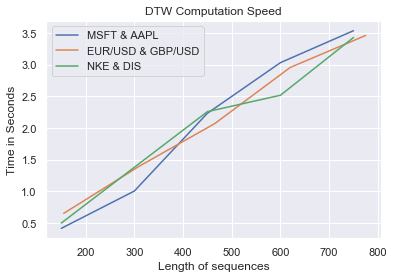

In [51]:
# Plot the lines in one graph
lists_1 = sorted(d_1.items())
x_1,y_1 = zip(*lists_1)

lists_2 = sorted(d_2.items())
x_2,y_2 = zip(*lists_2)

lists_3 = sorted(d_3.items())
x_3,y_3 = zip(*lists_3)

sns.set(font_scale = 1)
plt.plot(x_1, y_1, label='MSFT & AAPL')
plt.plot(x_2, y_2, label='EUR/USD & GBP/USD')
plt.plot(x_3, y_3, label='NKE & DIS')

plt.title('DTW Computation Speed')
plt.xlabel('Length of sequences')
plt.ylabel('Time in Seconds')
plt.legend()
plt.savefig('dtw_comp_speed.png', dpi=200)
plt.show()

In [108]:
d_1

{150: 0.41721296310424805,
 300: 1.0068230628967285,
 450: 2.2349939346313477,
 600: 3.034250020980835,
 750: 3.5388119220733643}

In [109]:
d_2

{155: 0.6542997360229492,
 310: 1.3983831405639648,
 465: 2.071424961090088,
 620: 2.958024024963379,
 775: 3.4635047912597656}

In [110]:
d_3

{150: 0.5008909702301025,
 300: 1.3818209171295166,
 450: 2.2604868412017822,
 600: 2.5195248126983643,
 750: 3.4309680461883545}

In [113]:
for i in d_3.values():
    print(round(i, 3))

0.501
1.382
2.26
2.52
3.431


## Comparison between Euclidean & DTW

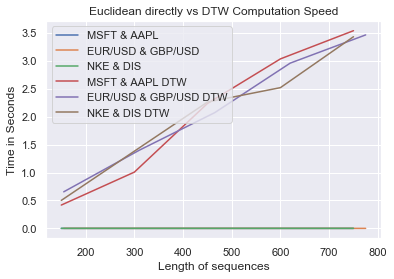

In [52]:
# Plot the lines in one graph Eucl vs DTW
lists_1 = sorted(e_1.items())
x_1,y_1 = zip(*lists_1)

lists_2 = sorted(e_2.items())
x_2,y_2 = zip(*lists_2)

lists_3 = sorted(e_3.items())
x_3,y_3 = zip(*lists_3)

lists_4 = sorted(d_1.items())
x_4,y_4 = zip(*lists_4)

lists_5 = sorted(d_2.items())
x_5,y_5 = zip(*lists_5)

lists_6 = sorted(d_3.items())
x_6,y_6 = zip(*lists_6)

sns.set(font_scale = 1)
plt.plot(x_1, y_1, label='MSFT & AAPL')
plt.plot(x_2, y_2, label='EUR/USD & GBP/USD')
plt.plot(x_3, y_3, label='NKE & DIS')

plt.plot(x_4, y_4, label='MSFT & AAPL DTW')
plt.plot(x_5, y_5, label='EUR/USD & GBP/USD DTW')
plt.plot(x_6, y_6, label='NKE & DIS DTW')

plt.title('Euclidean directly vs DTW Computation Speed')
plt.xlabel('Length of sequences')
plt.ylabel('Time in Seconds')
plt.legend()
plt.savefig('eucl_dtw_comparison.png', dpi=200)
plt.show()

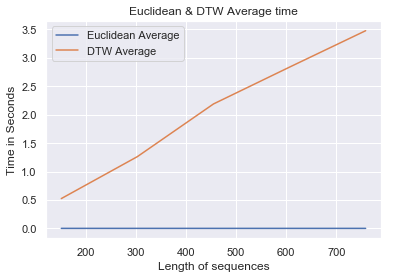

In [53]:
# Plot the lines in one graph AVERAGE eucl vs dtw
lists_1 = sorted(e_1.items())
x_1,y_1 = zip(*lists_1)

lists_2 = sorted(e_2.items())
x_2,y_2 = zip(*lists_2)

lists_3 = sorted(e_3.items())
x_3,y_3 = zip(*lists_3)

lists_4 = sorted(d_1.items())
x_4,y_4 = zip(*lists_4)

lists_5 = sorted(d_2.items())
x_5,y_5 = zip(*lists_5)

lists_6 = sorted(d_3.items())
x_6,y_6 = zip(*lists_6)

# Average
x1 = np.mean(np.array([x_1, x_2, x_3]), axis=0)
y1 = np.mean(np.array([y_1, y_2, y_3]), axis=0)

x2 = np.mean(np.array([x_4, x_5, x_6]), axis=0)
y2 = np.mean(np.array([y_4, y_5, y_6]), axis=0)

sns.set(font_scale = 1)
plt.plot(x1, y1, label='Euclidean Average')

plt.plot(x2, y2, label='DTW Average')

plt.title('Euclidean & DTW Average time')
plt.xlabel('Length of sequences')
plt.ylabel('Time in Seconds')
plt.legend()
plt.savefig('eucl_dtw_comparison_average.png', dpi=200)
plt.show()

# Example notes

In [26]:
y1 = [0.417, 1.007, 2.235, 3.034, 3.539]
y2 = [0.654, 1.398, 2.071, 2.958, 3.464]
y3 = [0.501, 1.382, 2.260, 2.520, 3.431]

y = np.mean(np.array([y1, y2, y3]), axis=0)

In [27]:
x1 = [150, 300, 450, 600, 750]
x2 = [155, 310, 465, 620, 775]
x3 = [150, 300, 450, 600, 750]

x = np.mean(np.array([x1, x2, x3]), axis=0)

In [28]:
x

array([151.66666667, 303.33333333, 455.        , 606.66666667,
       758.33333333])

In [29]:
y

array([0.524     , 1.26233333, 2.18866667, 2.83733333, 3.478     ])

In [33]:
np.corrcoef(x,y)

array([[1.       , 0.9975493],
       [0.9975493, 1.       ]])

In [34]:
?np.corrcoef

In [11]:
start = (150+155+150)/3

In [13]:
end = (750+775+750)/3

In [14]:
end

758.3333333333334

In [12]:
start

151.66666666666666

In [15]:
x[-1]

3.478

In [21]:
x[0]

0.524

In [22]:
r = (x[-1]-x[0])/(end-start)
r

0.004869230769230769

In [25]:
758.333333333334*r

3.6925000000000034

In [ ]:
a = [1, 1, 1, 2, 3, 4, 3, 2, 1]
b = [1, 2, 3, 4, 3, 2, 1, 1, 1]

In [ ]:
%%time
dist_1 = np.linalg.norm(np.array(a, dtype=np.float)-np.array(b, dtype=np.float))
print(dist_1)

In [ ]:
%%time
dtw_dist = dtw(a, b, window=10)
print(dtw_dist[-1,-1])
print(dtw_dist)

In [ ]:
%%time
a = [1, 2, 3, 4, 23, 91, 23, 1201]
b = [0, 1, 2, 3]

dtw_distance = dtw(msft, aapl, window=10)
print(dtw_distance[-1,-1])

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

# a = np.array([1, 2, 3, 4])
# b = np.array([0, 1, 2, 3])

distance, path = fastdtw(a, b, dist=euclidean)

print(distance)
print(path)

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
x = np.arange(0, 20, .5)
s1 = np.sin(x)
s2 = np.sin(x - 1)

s1 = data_1['MSFT']
s2 = data_1['AAPL']
d, paths = dtw.warping_paths(s1, s2, window=len(s1), psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [ ]:
def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

## Try out